In [3]:
pwd()
using Pkg; Pkg.activate("../../FermiCG/")
using FermiCG, NPZ, JLD2
using Plots

readdir()

  Activating project at `~/code/FermiCG`


19-element Vector{String}:
 ".ipynb_checkpoints"
 "README.md"
 "cis_sa_density_mat.npy"
 "clustering.ipynb"
 "density_mat.npy"
 "geometry_1.xyz"
 "integrals_h0.npz"
 "integrals_h1.npz"
 "integrals_h2.npz"
 "integrals_single_precision.npz"
 "mo_coeffs_act.npy"
 "mo_coeffs_doc.npy"
 "overlap_mat.npy"
 "rhf.out"
 "rhf.py"
 "scf.fchk"
 "scf.ipynb"
 "tet-4mer-rhf.py"
 "venv"

In [28]:
# build this just so we can print out molden files to view the MOs
molecule = "
H           -3.426100        -2.240400         5.488400
H           -5.627400        -1.077000         5.214700
C           -3.653500        -1.732700         4.551600
H           -1.767100        -2.237000         3.663900
C           -4.907300        -1.068800         4.394700
H           -6.163100         0.096400         3.101400
C           -2.725800        -1.732100         3.540600
H           -0.300300         1.083200        -5.235700
C           -5.209800        -0.419000         3.224900
C           -2.996100        -1.063600         2.307300
H           -1.103000        -1.532900         1.397700
H           -0.427000        -0.802900        -0.856600
H            0.236100        -0.097900        -3.127300
C           -1.019300         1.073000        -4.415000
H           -2.498800         2.251900        -5.503400
C           -4.274000        -0.392400         2.144500
H           -5.501500         0.794400         0.831000
C           -2.061300        -1.027200         1.271800
C           -1.382000        -0.289500        -0.977200
C           -0.717100         0.418000        -3.247600
C           -2.272000         1.739500        -4.569000
H           -4.157600         2.241200        -3.678700
C           -4.546300         0.281700         0.953400
C           -2.324300        -0.340200         0.070400
C           -1.652800         0.387400        -2.167000
C           -3.199800         1.734100        -3.558400
C           -3.604400         0.330900        -0.094300
C           -2.930200         1.059100        -2.329200
C           -3.866500         1.018700        -1.295500
H           -4.824300         1.525600        -1.421700
H            6.954300         5.020900        -5.781400
H            9.130800         5.788500        -4.794600
C            7.130300         4.913900        -4.709900
H            5.199700         4.047800        -4.322900
C            8.368100         5.351000        -4.148200
H            9.543000         5.570100        -2.368400
C            6.155900         4.370100        -3.908500
H            4.469100         3.270900        -2.103400
C            8.601900         5.233600        -2.800800
C            6.366300         4.207300        -2.503300
C            5.408400         3.620800        -1.673100
C            7.624000         4.655100        -1.933900
H            8.793800         4.849500        -0.136000
H            3.726000         2.535700         0.128600
C            5.630800         3.465600        -0.289200
C            7.849900         4.509800        -0.563800
C            4.668600         2.877900         0.557100
C            6.887300         3.923700         0.283000
H            8.046600         4.121200         2.098700
H            2.974600         1.818600         2.362500
C            4.893400         2.733400         1.927600
C            7.108600         3.769300         1.667200
C            3.915400         2.155900         2.795000
H            3.383500         1.608200         4.789600
C            6.150200         3.183400         2.497000
H            7.316000         3.346600         4.316500
C            4.148200         2.042400         4.143100
C            6.360000         3.023000         3.902600
C            5.385400         2.480900         4.704600
H            5.560600         2.377300         5.776700
H            1.028200         5.020900        -5.781400
H            3.204700         5.788500        -4.794600
C            1.204300         4.913900        -4.709900
H           -0.726400         4.047800        -4.322900
C            2.442000         5.351000        -4.148200
H            3.616900         5.570100        -2.368400
C            0.229800         4.370100        -3.908500
H           -1.457000         3.270900        -2.103400
C            2.675800         5.233600        -2.800800
C            0.440300         4.207300        -2.503300
C           -0.517600         3.620800        -1.673100
C            1.697900         4.655100        -1.933900
H            2.867800         4.849500        -0.136000
H           -2.200000         2.535700         0.128600
H           -2.951500         1.818600         2.362500
C           -0.295200         3.465600        -0.289200
C            1.923900         4.509800        -0.563800
H           -2.542500         1.608200         4.789600
C           -1.257500         2.877900         0.557100
C           -2.010600         2.155900         2.795000
C            0.961300         3.923700         0.283000
H            2.120600         4.121200         2.098700
C           -1.777900         2.042400         4.143100
H           -0.365500         2.377300         5.776700
C           -1.032700         2.733400         1.927600
C            1.182500         3.769300         1.667200
C           -0.540600         2.480900         4.704600
C            0.224100         3.183400         2.497000
C            0.434000         3.023000         3.902600
H            1.389900         3.346600         4.316500
H            3.427300         2.251900        -5.503400
H            5.625800         1.083200        -5.235700
C            3.654100         1.739500        -4.569000
H            1.768500         2.241200        -3.678700
H            0.298700        -1.077000         5.214700
C            4.906700         1.073000        -4.415000
H            6.162100        -0.097900        -3.127300
C            2.726300         1.734100        -3.558400
H           -0.237000         0.096400         3.101400
C            1.018700        -1.068800         4.394700
H            2.500000        -2.240400         5.488400
H            0.424600         0.794400         0.831000
H            1.101800         1.525600        -1.421700
C            5.209000         0.418000        -3.247600
C            2.995900         1.059100        -2.329200
C            0.716200        -0.419000         3.224900
C            2.272600        -1.732700         4.551600
H            4.159000        -2.237000         3.663900
C            1.379700         0.281700         0.953400
C            2.059600         1.018700        -1.295500
C            4.273300         0.387400        -2.167000
H            5.499100        -0.802900        -0.856600
C            1.652100        -0.392400         2.144500
C            3.200300        -1.732100         3.540600
C            2.321700         0.330900        -0.094300
C            4.544100        -0.289500        -0.977200
C            2.930000        -1.063600         2.307300
C            3.601700        -0.340200         0.070400
C            3.864800        -1.027200         1.271800
H            4.823000        -1.532900         1.397700
"
atoms = []
for (li,line) in enumerate(split(rstrip(lstrip(molecule)), "\n"))
    l = split(line)
    push!(atoms, Atom(li, l[1], parse.(Float64,l[2:4])))
end

basis = "6-31g*"
# 
# Create FermiCG.Molecule type
mol     = Molecule(0, 1, atoms,basis);



In [29]:
#load integrals from disk
ints = InCoreInts(
    npzread("integrals_h0.npz")["a"], 
    npzread("integrals_h1.npz")["a"], 
    npzread("integrals_h2.npz")["a"] 
);
C = npzread("mo_coeffs_act.npy")
S = npzread("overlap_mat.npy");
D = npzread("density_mat.npy");


 Laplacian Eigenvalues
    1  -0.00000000
    2   0.13146136
    3   0.19888135
    4   0.25338742
    5   0.53486388
    6   0.56226787
    7   0.59069789
    8   0.62323115
    9   0.72133549
   10   0.75825325
   11   0.77441450
   12   0.79054185
   13   0.80143467
   14   0.81899258
   15   0.83062677
   16   0.84633365
   17   0.84870108
   18   0.85548451
   19   0.86667805
   20   0.87760446
   21   0.91917238
   22   0.92745317
   23   0.95096533
   24   0.97990048
   25   0.98951815
   26   0.99490705
   27   1.01028349
   28   1.01394750
   29   1.02563022
   30   1.04678446
   31   1.04965913
   32   1.05412708
   33   1.06131531
   34   1.07801951
   35   1.08126506
   36   1.08943823
   37   1.09337655
   38   1.09445474
   39   1.09823615
   40   1.11183438
   41   1.11688588
   42   1.12131647
   43   1.12673277
   44   1.13479619
   45   1.13915151
   46   1.14274899
   47   1.14821809
   48   1.16352237
   49   1.17249666
   50   1.18526815
   51   1.18667188
   52   

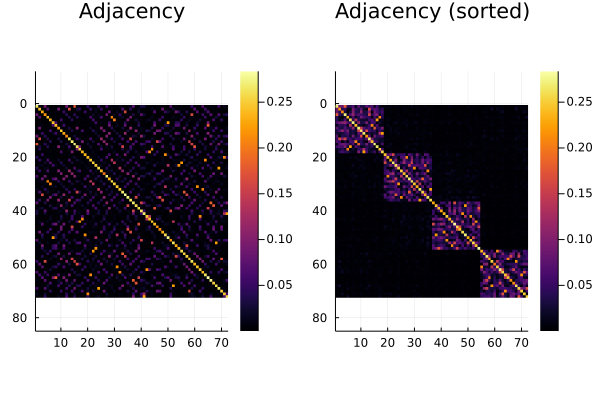

In [31]:
using LinearAlgebra, Printf
using Clustering
using SpectralClustering
using Random
Random.seed!(2)

function cluster_orbitals(A, n_clusters)
    """
    A is adjacency matrix
    """
    
    L = Diagonal([sum(A[i,:]) for i in 1:size(A,1)]) - A;
    F = eigen(L);
    perm = sortperm(F.values, by=abs)
    F.values .= F.values[perm]
    F.vectors .= F.vectors[:,perm]

    print(" Laplacian Eigenvalues\n")
    for (fi_idx, fi) in enumerate(F.values)
        @printf(" %4i %12.8f\n", fi_idx, fi)
    end
    
    p1 = plot(F.values)
    
    A = abs.(F.vectors[:,1:n_clusters]*F.vectors[:,1:n_clusters]')
    p2 = heatmap(abs.(A), aspect_ratio=:equal, title="Projector", yflip = true)
    
    clustering = clusterize(KMeansClusterizer(n_clusters), A).assignments;

    perm = sortperm(clustering)
    p3 = heatmap(abs.(A[perm,perm]), aspect_ratio=:equal, title="Projector", yflip = true)

    clusters = [ [] for i in 1:n_clusters]
    for (idx,i) in enumerate(clustering)
        push!(clusters[i],idx)
    end

    plot(p1, p2, p3, layout = @layout [a; b c])

    return perm, clusters
end

n_clusters = 4
adjacency = abs.(C'*D*C)
perm, cluster_list = cluster_orbitals(adjacency, n_clusters)
print(perm)
    
p1 = heatmap(adjacency, aspect_ratio=:equal, title="Adjacency", yflip = true) 
p2 = heatmap(adjacency[perm, perm], aspect_ratio=:equal, title="Adjacency (sorted)", yflip = true) 

# ints_sorted = deepcopy(ints)
# ints_sorted.h1 .= ints.h1[perm,perm]
# ints_sorted.h2 .= ints.h2[perm,perm,perm,perm];
C_sorted = C[:,perm]
FermiCG.pyscf_write_molden(mol,C_sorted,filename="orbitals.molden");

plot(p1, p2, layout = @layout [a b])


In [32]:
# define clusters
clusters = [Cluster(i,collect(cluster_list[i])) for i = 1:length(cluster_list)]
init_fspace = [ (1,1) for i in 1:n_clusters]
display(clusters)


4-element Vector{Cluster}:
 Cluster(1, [1, 4, 12, 15, 20, 24, 27, 32, 37, 40, 41, 51, 59, 63, 66, 69, 71, 72])
 Cluster(2, [2, 5, 9, 13, 16, 17, 21, 25, 29, 33, 36, 44, 48, 52, 56, 60, 64, 68])
 Cluster(3, [3, 7, 8, 11, 19, 23, 28, 31, 34, 39, 45, 49, 50, 53, 54, 57, 61, 65])
 Cluster(4, [6, 10, 14, 18, 22, 26, 30, 35, 38, 42, 43, 46, 47, 55, 58, 62, 67, 70])

# Sub-divide Chromophores
Each chromophore now has 18 orbitals, which is too large for exact. Let's break each cluster up into 3 smaller 6 orbital clusters.
We will do this by block diagonalizing the fock matrix

In [61]:
ntot = 0
Cnew = zeros(size(C))
for ci in clusters
    den1 = C'*D*C*2
    den1 = den1[ci.orb_list, ci.orb_list]
    d1_evals, d1_evecs = eigen(den1);
    # display(clusters[1].orb_list)
    # display(d1_evals)
    display(sum(d1_evals))
    ntot += sum(d1_evals)
    eye = Matrix(1.0I, size(C)...) 
    Cnew[:,ci.orb_list] .= C[:,ci.orb_list]*d1_evecs
end
println(ntot)
Cnew
FermiCG.pyscf_write_molden(mol,Cnew,filename="orbitals.molden");


9.087665456918284

9.049693151809189

8.96052390018546

8.802584133101695

35.90046664201463


# CMF

In [18]:
rdm1 = C'*D*C

e_cmf, U, Da, Db  = FermiCG.cmf_oo(ints_sorted, clusters, init_fspace, rdm1, rdm1,
                                        max_iter_oo=50, verbose=0, gconv=1e-6, method="bfgs");


 ooCMF Iter:    1 Total= -154.585166114790 Active=  -2.929168027221 G=     2.84e-03
 ooCMF Iter:    2 Total= -154.585174583845 Active=  -2.929176496276 G=     4.63e-04
 ooCMF Iter:    3 Total= -154.585174724027 Active=  -2.929176636457 G=     3.97e-05
 ooCMF Iter:    4 Total= -154.585174725560 Active=  -2.929176637991 G=     1.31e-06


 * Status: success

 * Candidate solution
    Final objective value:     -1.545852e+02

 * Found with
    Algorithm:     BFGS

 * Convergence measures
    |x - x'|               = 2.36e-06 ≰ 0.0e+00
    |x - x'|/|x'|          = 4.59e-04 ≰ 0.0e+00
    |f(x) - f(x')|         = 1.88e-12 ≰ 0.0e+00
    |f(x) - f(x')|/|f(x')| = 1.21e-14 ≰ 0.0e+00
    |g(x)|                 = 1.15e-08 ≤ 1.0e-06

 * Work counters
    Seconds run:   0  (vs limit Inf)
    Iterations:    4
    f(x) calls:    13
    ∇f(x) calls:   13


*ooCMF Iter:    5 Total= -154.585174725562 Active=  -2.929176637993 G=     1.37e-08
*ooCMF -154.58517473 


In [19]:
# FermiCG.pyscf_write_molden(mol,C_cmf,filename="benzene_10mer_cmf.molden");
ints_cmf = FermiCG.orbital_rotation(ints,U);

# TPSCI with PM orbitals

In [20]:
max_roots = 100

#
# Build Cluster basis
cluster_bases = FermiCG.compute_cluster_eigenbasis(ints, clusters, verbose=0, max_roots=max_roots,
        init_fspace=init_fspace, rdm1a=Da, rdm1b=Db);
#
# Build ClusteredOperator
clustered_ham = FermiCG.extract_ClusteredTerms(ints, clusters);

#
# Build Cluster Operators
cluster_ops = FermiCG.compute_cluster_ops(cluster_bases, ints);

#
# Add cmf hamiltonians for doing MP-style PT2 
FermiCG.add_cmf_operators!(cluster_ops, cluster_bases, ints, Da, Db, verbose=0);


 Remove duplicates
 Number of terms reduced from    62 to    34


In [21]:
nroots = 1
ci_vector = FermiCG.TPSCIstate(clusters, FermiCG.FockConfig(init_fspace), R=nroots);
display(ci_vector)

 --------------------------------------------------
 ---------- Fockspaces in state ------: Dim =     1  
 ----------                root ------:     =     1  
 --------------------------------------------------
 Printing contributions greater than: 0.001000
 Weight              # Configs           Fock space(α,β)...  
 -------             ---------           ----------          
 --------------------------------------------------


In [22]:
e0, v0 = FermiCG.tpsci_ci(ci_vector, cluster_ops, clustered_ham,
                            thresh_cipsi=1e-3, # Threshold for adding to P-space
                            thresh_foi=1e-5,    # Threshold for keeping terms when defining FOIS    
                            thresh_asci=1e-2,     # Threshold of P-space configs to search from
                            max_iter=10,
                            matvec=3);

 ci_vector     : (1, 1)
 thresh_cipsi  : 0.001
 thresh_foi    : 1.0e-5
 thresh_asci   : 0.01
 thresh_var    : -1.0
 max_iter      : 10
 conv_thresh   : 0.0001
 nbody         : 4
 incremental   : true
 ci_conv       : 1.0e-5
 ci_max_iter   : 50
 ci_max_ss_vecs: 12
 davidson      : false
 max_mem_ci    : 20.0
 matvec        : 3


     Selected CI Iteration:    1 epsilon:   0.00100000
 Memory needed to hold full CI matrix:   0.00000001 (Gb)

 |== Tensor Product State CI =======================================
 Hamiltonian matrix dimension =     1: 
 Build full Hamiltonian matrix with dimension:       0.001789 seconds (203 allocations: 12.625 KiB)
 Diagonalize: 
                                      0.000006 seconds (4 allocations: 224 bytes)
 Compute S2 expectation values:                      0.000848 seconds (356 allocations: 25.062 KiB)
  Root       Energy           S2
     1  -3.26446048   0.00000000
 ==================================================================|
 Length of ASCI 

In [10]:
e0[1]+ints.h0

-154.95333862914578

# TPSCI with CMF orbitals

In [11]:
max_roots = 100

#
# Build Cluster basis
cluster_bases = FermiCG.compute_cluster_eigenbasis(ints_cmf, clusters, verbose=0, max_roots=max_roots,
        init_fspace=init_fspace, rdm1a=Da, rdm1b=Db);
#
# Build ClusteredOperator
clustered_ham = FermiCG.extract_ClusteredTerms(ints_cmf, clusters);

#
# Build Cluster Operators
cluster_ops = FermiCG.compute_cluster_ops(cluster_bases, ints_cmf);

#
# Add cmf hamiltonians for doing MP-style PT2 
FermiCG.add_cmf_operators!(cluster_ops, cluster_bases, ints, Da, Db, verbose=0);


 Remove duplicates
 Number of terms reduced from    62 to    34


In [12]:
nroots = 1
ci_vector = FermiCG.TPSCIstate(clusters, FermiCG.FockConfig(init_fspace), R=nroots);
display(ci_vector)

 --------------------------------------------------
 ---------- Fockspaces in state ------: Dim =     1  
 ----------                root ------:     =     1  
 --------------------------------------------------
 Printing contributions greater than: 0.001000
 Weight              # Configs           Fock space(α,β)...  
 -------             ---------           ----------          
 --------------------------------------------------


In [13]:
e0, v0 = FermiCG.tpsci_ci(ci_vector, cluster_ops, clustered_ham,
                            thresh_cipsi=1e-3, # Threshold for adding to P-space
                            thresh_foi=1e-5,    # Threshold for keeping terms when defining FOIS    
                            thresh_asci=1e-2,     # Threshold of P-space configs to search from
                            max_iter=10,
                            matvec=3);

 ci_vector     : (1, 1)
 thresh_cipsi  : 0.001
 thresh_foi    : 1.0e-5
 thresh_asci   : 0.01
 thresh_var    : -1.0
 max_iter      : 10
 conv_thresh   : 0.0001
 nbody         : 4
 incremental   : true
 ci_conv       : 1.0e-5
 ci_max_iter   : 50
 ci_max_ss_vecs: 12
 davidson      : false
 max_mem_ci    : 20.0
 matvec        : 3


     Selected CI Iteration:    1 epsilon:   0.00100000
 Memory needed to hold full CI matrix:   0.00000001 (Gb)

 |== Tensor Product State CI =======================================
 Hamiltonian matrix dimension =     1: 
 Build full Hamiltonian matrix with dimension:       0.005898 seconds (203 allocations: 12.625 KiB)
 Diagonalize: 
                                      0.000005 seconds (4 allocations: 224 bytes)
 Compute S2 expectation values:                      0.016561 seconds (349 allocations: 24.844 KiB)
  Root       Energy           S2
     1  -3.29322014   0.00000000
 ==================================================================|
 Length of ASCI 

In [14]:
e0[1]+ints.h0

-154.95333786241065